### Описание датасета
-  Регион - субъект Российской Федерации, где находится медицинское учреждение
-  Календарный_год - год
-  Период - месяц
-  gender - пол респондента
-  poselenie - ответ на вопрос "Вы постоянно проживаете в городе или в сельской местности?"
-  Населенный_пункт - название населенного пункта, где находится медицинское учреждение
-  org_type - ответ на вопрос "В каких организациях Вы обычно получаете медицинскую помощь?"
-  last_visit - ответ на вопрос "Как давно Вы в последний раз получали медицинскую помощь?"
-  time_of_register - ответ на вопрос "Насколько Вы согласны с утверждением, что сейчас Вы можете записаться к врачу в удобное для Вас время?" (1-5 баллы по 5-бальной шкале)
-  wait_time - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания медицинской услуги с момента возникновения потребности в медицинской помощи до момента ее получения?" (1-5 баллы по 5-бальной шкале)
-  near_cab - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания непосредственно перед кабинетом?" (1-5 баллы по 5-бальной шкале)
-  comfort - ответ на вопрос "Насколько комфортным было Ваше пребывание в медицинской организации (комфортность зон ожидания, комфортное перемещение внутри медицинской организации)?" (1-5 баллы по 5-бальной шкале)
-  attitude - ответ на вопрос "Насколько Вы удовлетворены отношением к Вам со стороны медицинского персонала (врачи, мед. сестры, регистраторы, санитары)?" (1-5 баллы по 5-бальной шкале)
-  explain - ответ на вопрос "Удовлетворены ли Вы тем, как врач объяснял Вам, зачем назначено то или иное лечение, лекарственный препарат, диагностическая процедура?" (1-5 баллы по 5-бальной шкале)
-  expect - ответ на вопрос "Насколько результат Вашего обращения в медицинскую организацию соответствовал Вашим ожиданиям?" (1-5 баллы по 5-бальной шкале)
-  loyalty - ответ на вопрос "Вы бы посоветовали близким друзьям или родственникам обращаться за медицинской помощью в Вашу медицинскую организацию?" (1-5 баллы по 5-бальной шкале)
-  gen_sat - ответ на вопрос "Оцените, насколько в целом Вы удовлетворены медицинской помощью?" (1-5 баллы по 5-бальной шкале)
-  open_question_1 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в медицинской организации, в которой Вы получаете медицинскую помощь?"
-  open_question_2 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в регионе, в котором Вы проживаете?"
-  date_of_survey - дата опроса
-  respondent_number - номер респондента
-  doctor_domestic_visit_problem - ответ на вопрос "Возникали ли у Вас сложности при вызове врача на дом?"
-  diag_services_available - ответ на вопрос "Можете ли Вы получить при оказании первичной медико-санитарной помощи в Вашей медицинской организации диагностические и лабораторные услуги?"
-  disabled_facilitites_available - ответ на вопрос "Есть ли в Вашей медицинской организации приспособления для лиц с ограниченными возможностями?
-  problem_solved - ответ на вопрос "Была ли решена Ваша медицинская проблема?"
- region_medical_care - ответ на вопрос "Оцените, насколько Вы удовлетворены доступностью медицинской помощи в Вашем регионе?"

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn
import os
from scipy.special import softmax
from scipy.stats import chi2_contingency
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [440]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [441]:
from tqdm import tqdm
tqdm.pandas()

In [442]:
df = pd.read_csv('Anketa.csv', on_bad_lines='warn', sep=';')
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_30880\3837633047.py:1: DtypeWarning: Columns (28,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anketa.csv', on_bad_lines='warn', sep=';')


(1301055, 35)

In [443]:
df.head()

,Регион,Календарный_год,Период,gender,poselenie,Населенный_пункт,org_type,last_visit,time_of_register,wait_time,near_cab,comfort,attitude,explain,expect,loyalty,gen_sat,open_question_1,open_question_2,date_of_survey,respondent_number,doctor_domestic_visit_problem,diag_services_available,disabled_facilitites_available,region_medical_care_availability,age,problem_solved,Удовлетворенность_доступностью_лекарств,health_selfestimation,children_number,1st_child_health,2nd_child_health,3d_child_health,4th_child_health,5th_child_health
1311,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Всеволожский р-н., г. Сертолово",Только в государственных,менее 1 мес. назад\t,5,4,4,4,3,4,4,3,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,1.000,Не пользовался данной услугой,Затрудняюсь ответить,Затрудняюсь ответить,4,19.000,Затрудняюсь ответить,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Всеволожский р-н., г. Всеволожск",Только в частных,более 12 мес. назад,Затрудняюсь ответить,5,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,2.000,Нет,Затрудняюсь ответить,Да,5,22.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Гатчинский р-н., г. Гатчина",Только в государственных,менее 1 мес. назад\t,3,2,5,5,5,Затрудняюсь ответить,5,4,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,3.000,Нет,Затрудняюсь ответить,Да,5,28.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1314,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Волосовский р-н., Торосово д.",Только в государственных,более 12 мес. назад,5,4,5,5,5,5,Затрудняюсь ответить,5,5,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,4.000,Да,Да,Да,Затрудняюсь ответить,30.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Выборгский р-н., г. Выборг",Только в государственных,менее 1 мес. назад\t,Затрудняюсь ответить,5,5,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,5.000,Нет,Затрудняюсь ответить,Да,Затрудняюсь ответить,34.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [444]:
# Переименуем колонки
column_mapping = {
    'Календарный_год': 'year',
    'Регион': 'Region',
    'Период': 'period',
    'poselenie': 'locality_type',
    'Населенный_пункт': 'locality',
    'zapis': 'time_of_register',
    'ozhid': 'wait_time',
    'Дата_проведения_опроса_в_формате_дд_мм_гггг': 'date_of_survey',
    'Номер_респондента': 'respondent_number',
    '16': 'region_medical_care_availability',
    '17': 'doctor_domestic_visit_problem',
    '18': 'diag_services_available',
    '19': 'disabled_facilitites_available',
    'Возраст': 'age'
}

df = df.rename(columns=column_mapping)
columns_to_remove = ['Id', 'Удовлетворенность_доступностью_лекарств', 'health_selfestimation', 'children_number', '1st_child_health', '2nd_child_health', '3d_child_health', '4th_child_health', '5th_child_health']
df = df.drop(columns=columns_to_remove, errors='ignore')
df.head()

,Region,year,period,gender,locality_type,locality,org_type,last_visit,time_of_register,wait_time,near_cab,comfort,attitude,explain,expect,loyalty,gen_sat,open_question_1,open_question_2,date_of_survey,respondent_number,doctor_domestic_visit_problem,diag_services_available,disabled_facilitites_available,region_medical_care_availability,age,problem_solved
1311,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Всеволожский р-н., г. Сертолово",Только в государственных,менее 1 мес. назад\t,5,4,4,4,3,4,4,3,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,1.000,Не пользовался данной услугой,Затрудняюсь ответить,Затрудняюсь ответить,4,19.000,Затрудняюсь ответить
1312,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Всеволожский р-н., г. Всеволожск",Только в частных,более 12 мес. назад,Затрудняюсь ответить,5,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,2.000,Нет,Затрудняюсь ответить,Да,5,22.000,Да
1313,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Гатчинский р-н., г. Гатчина",Только в государственных,менее 1 мес. назад\t,3,2,5,5,5,Затрудняюсь ответить,5,4,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,3.000,Нет,Затрудняюсь ответить,Да,5,28.000,Да
1314,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Волосовский р-н., Торосово д.",Только в государственных,более 12 мес. назад,5,4,5,5,5,5,Затрудняюсь ответить,5,5,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,4.000,Да,Да,Да,Затрудняюсь ответить,30.000,Да
1315,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Выборгский р-н., г. Выборг",Только в государственных,менее 1 мес. назад\t,Затрудняюсь ответить,5,5,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,5.000,Нет,Затрудняюсь ответить,Да,Затрудняюсь ответить,34.000,Да


#### EDA

##### Разберемся, что делать с вариантами Затрудняюсь ответить

Вычисление коэффициентов Крамера: 100%|██████████| 169/169 [00:51<00:00,  3.29пара/s]


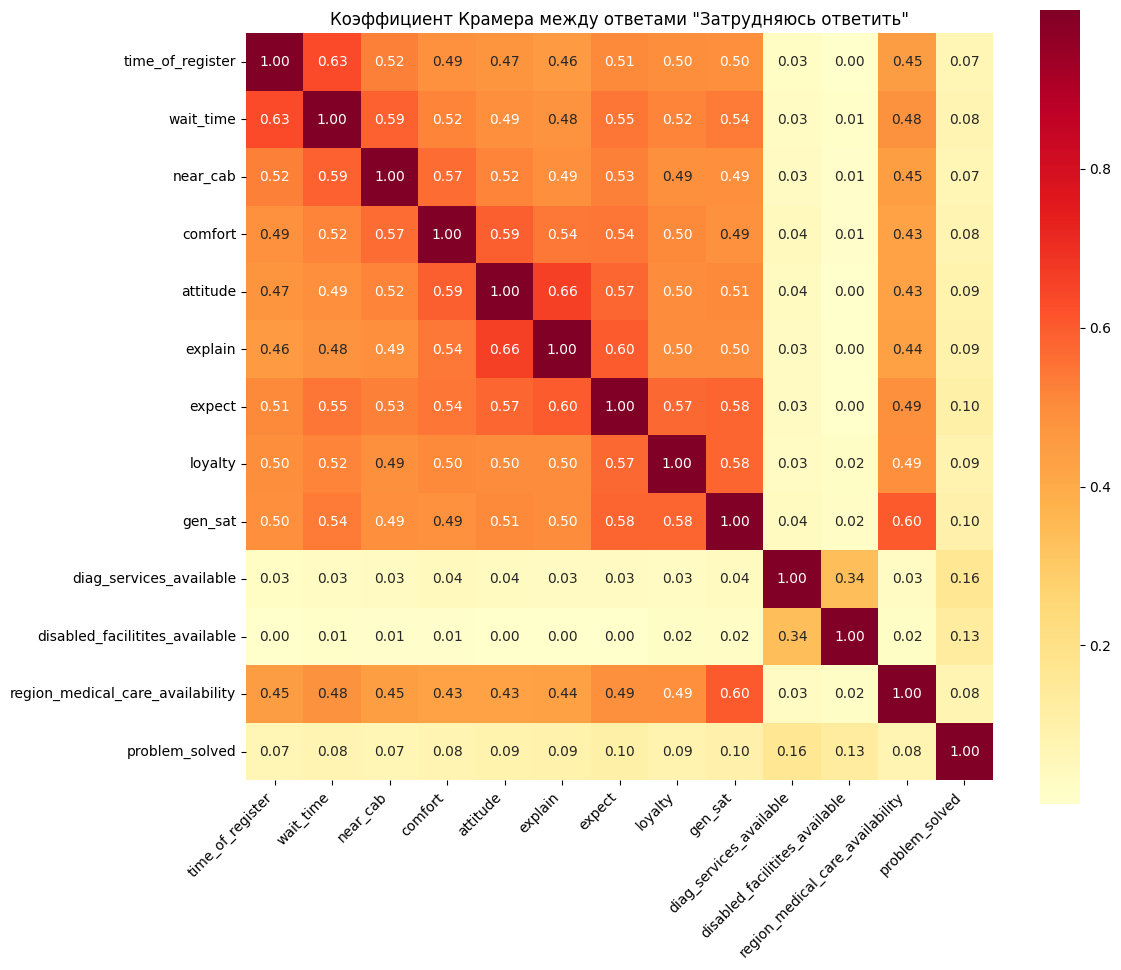

In [445]:
# Список колонок для анализа
columns = [
    'time_of_register', 'wait_time', 'near_cab', 'comfort',
    'attitude', 'explain', 'expect', 'loyalty', 'gen_sat',
    'diag_services_available', 'disabled_facilitites_available',
    'region_medical_care_availability', 'problem_solved'
]

# Создаем матрицы для хранения результатов
association_matrix = pd.DataFrame(index=columns, columns=columns)
cramer_matrix = pd.DataFrame(index=columns, columns=columns)

# Функция для вычисления коэффициента Крамера
def cramers_v(contingency_matrix):
    try:
        chi2 = chi2_contingency(contingency_matrix)[0]
        n = contingency_matrix.sum().sum()
        min_dim = min(contingency_matrix.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if n * min_dim > 0 else 0.0
    except:
        return 0.0
# Создаем все комбинации колонок
combinations = [(col1, col2) for col1 in columns for col2 in columns]
# Заполняем матрицы
for col1, col2 in tqdm(combinations, 
                       desc="Вычисление коэффициентов Крамера", 
                       total=len(combinations),
                       unit="пара"):
    # Создаем таблицу сопряженности для "Затрудняюсь ответить"
    mask1 = df[col1] == 'Затрудняюсь ответить'
    mask2 = df[col2] == 'Затрудняюсь ответить'
    contingency = pd.crosstab(mask1, mask2)
        
    # Вычисляем коэффициент Крамера
    cramer_v = cramers_v(contingency)
    cramer_matrix.loc[col1, col2] = cramer_v

# Создаем тепловую карту для коэффициента Крамера
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix.astype(float), 
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f',
            square=True)
plt.title('Коэффициент Крамера между ответами "Затрудняюсь ответить"')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Видно, что problem_solved не зависит от других ответов

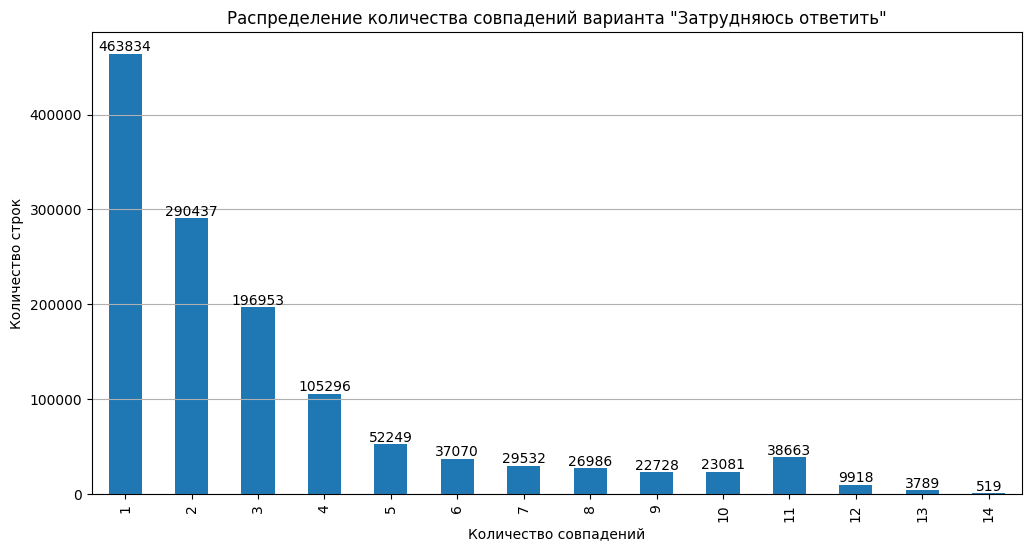

In [446]:
# Предположим, что строки с вариантом "Затрудняюсь ответить" можно удалить

# Создаем маску для каждого столбца
masks = {col: df[col] == 'Затрудняюсь ответить' for col in columns}

# Создаем DataFrame с масками
mask_df = pd.DataFrame(masks)

# Подсчитываем количество совпадений для каждой строки
mask_df['count'] = mask_df.sum(axis=1)

# Группируем по количеству совпадений и подсчитываем частоту
coincidence_counts = mask_df['count'].value_counts().sort_index()
coincidence_counts.index = range(1, len(coincidence_counts) + 1)
plt.figure(figsize=(12, 6))
ax = coincidence_counts.plot(kind='bar')
plt.title('Распределение количества совпадений варианта "Затрудняюсь ответить"')
plt.xlabel('Количество совпадений')
plt.ylabel('Количество строк')
plt.grid(True, axis='y')
for i, v in enumerate(coincidence_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [447]:
# Удаляем строки, где количество совпадений варианта "Затрудняюсь ответить" равно 10 или 11
rows_to_drop = mask_df[mask_df['count'].isin([10, 11, 12, 13])].index
df = df.drop(rows_to_drop)
print(df.shape)

(1248166, 27)


##### Сгенерим новые фичи на основе вариантов Затрудняюсь ответить на этапе генерации фич


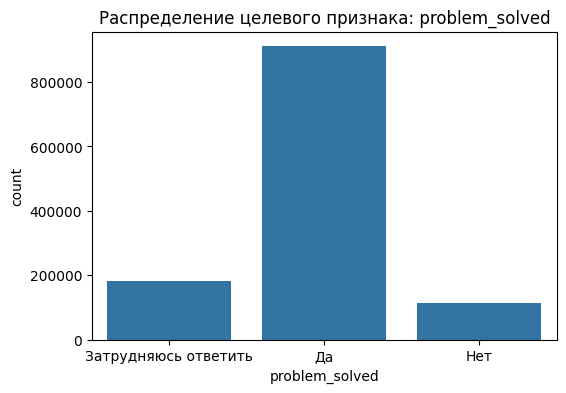

In [448]:
# Целевой признак: problem_solved
plt.figure(figsize=(6, 4))
sns.countplot(x='problem_solved', data=df)
plt.title('Распределение целевого признака: problem_solved')
plt.show()
# TODO сделать 3 класса

In [449]:
# имбаланс исправим на этапе разделдения выборок

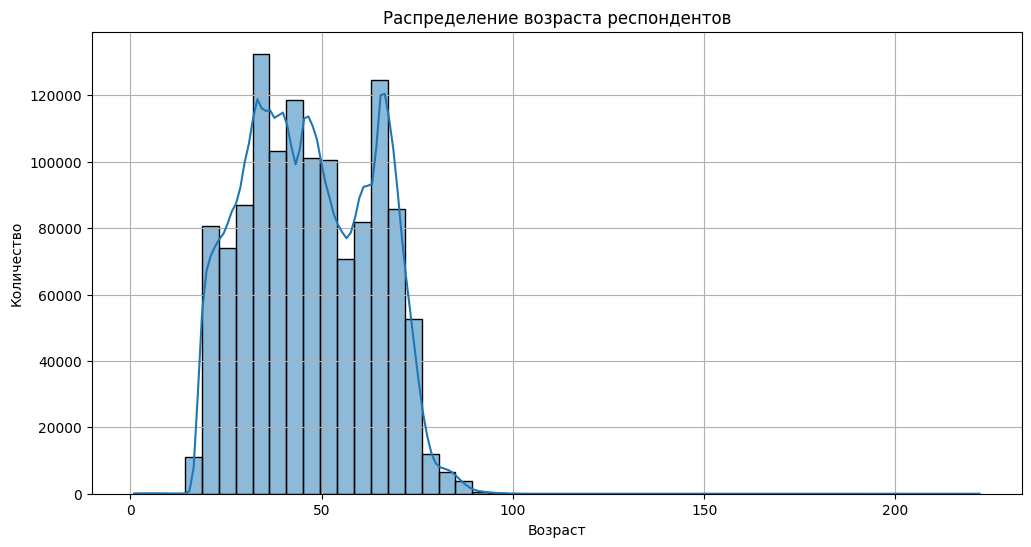


Статистика по возрасту:
count   1248162.000
mean         47.105
std          16.320
min           1.000
25%          34.000
50%          46.000
75%          61.000
max         222.000
Name: age, dtype: float64


In [450]:
# Целевой признак: Age
# Строим распределение возраста
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=50, kde=True)
plt.title('Распределение возраста респондентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Выводим базовую статистику
print("\nСтатистика по возрасту:")
print(df['age'].describe())


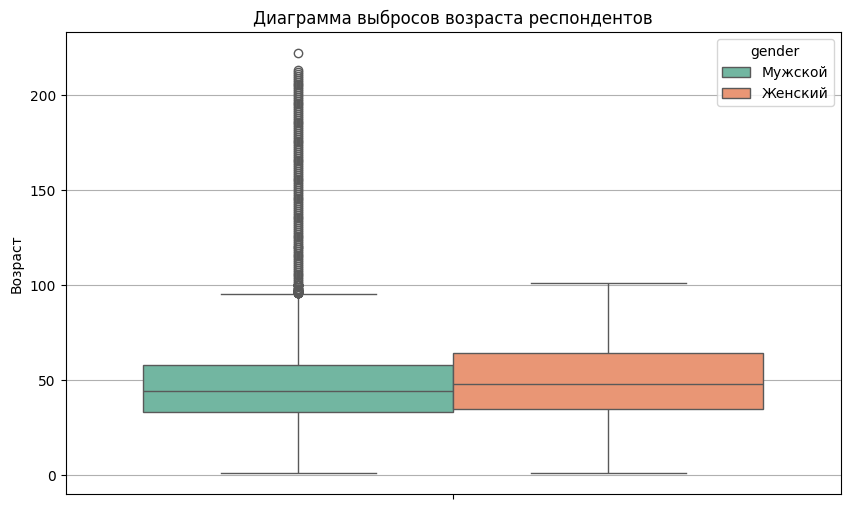

In [451]:
# Удалим строки с возрастом меньше 18 и аномальными значениями сверху
# Создаем box plot для анализа выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='age', hue='gender', palette='Set2')
plt.title('Диаграмма выбросов возраста респондентов')
plt.ylabel('Возраст')
plt.grid(True, axis='y')

In [452]:
# аномалия выбросов возраста
df[df['age'] > 100]

,Region,year,period,gender,locality_type,locality,org_type,last_visit,time_of_register,wait_time,near_cab,comfort,attitude,explain,expect,loyalty,gen_sat,open_question_1,open_question_2,date_of_survey,respondent_number,doctor_domestic_visit_problem,diag_services_available,disabled_facilitites_available,region_medical_care_availability,age,problem_solved
781888,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2079-09-08 00:00:00.000,57.000,Не пользовался данной услугой,Да,Да,4,101.000,Да
781889,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2080-09-08 00:00:00.000,58.000,Не пользовался данной услугой,Да,Да,4,102.000,Да
781890,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2081-09-08 00:00:00.000,59.000,Не пользовался данной услугой,Да,Да,4,103.000,Да
781891,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2082-09-08 00:00:00.000,60.000,Не пользовался данной услугой,Да,Да,4,104.000,Да
781892,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2083-09-08 00:00:00.000,61.000,Не пользовался данной услугой,Да,Да,4,105.000,Да
781893,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2084-09-08 00:00:00.000,62.000,Не пользовался данной услугой,Да,Да,4,106.000,Да
781894,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2085-09-08 00:00:00.000,63.000,Не пользовался данной услугой,Да,Да,4,107.000,Да
781895,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2086-09-08 00:00:00.000,64.000,Не пользовался данной услугой,Да,Да,4,108.000,Да
781896,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2087-09-08 00:00:00.000,65.000,Не пользовался данной услугой,Да,Да,4,109.000,Да
781897,Калининградская область,2023,Сентябрь,Мужской,Город,Гусев,Только в государственных,более 12 мес. назад,5,4,4,4,4,4,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить.,Затрудняюсь ответить.,2088-09-08 00:00:00.000,66.000,Не пользовался данной услугой,Да,Да,4,110.000,Да


In [453]:
# сначала удалим невалидные значения
df = df[df['age'] >= 18]
df = df[df['age'] <= 100]

In [454]:
# Расчёт квартилей и IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [455]:
# Верхняя граница
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Удаление выбросов сверху
df = df[df['age'] <= upper_bound]
# Удалим строки с возрастом меньше 18
df = df[df['age'] >= lower_bound]

In [456]:
df.shape

(1247743, 27)

In [457]:
# Пропуски
display(df.isnull().sum())

Region                                   0
year                                     0
period                                   0
gender                                   1
locality_type                            1
locality                               695
org_type                             39454
last_visit                           39776
time_of_register                     39429
wait_time                            39421
near_cab                             39426
comfort                              39424
attitude                             39431
explain                              39431
expect                               39488
loyalty                              39530
gen_sat                                 19
open_question_1                     210738
open_question_2                     247681
date_of_survey                           3
respondent_number                     1552
doctor_domestic_visit_problem        82189
diag_services_available              92287
disabled_fa

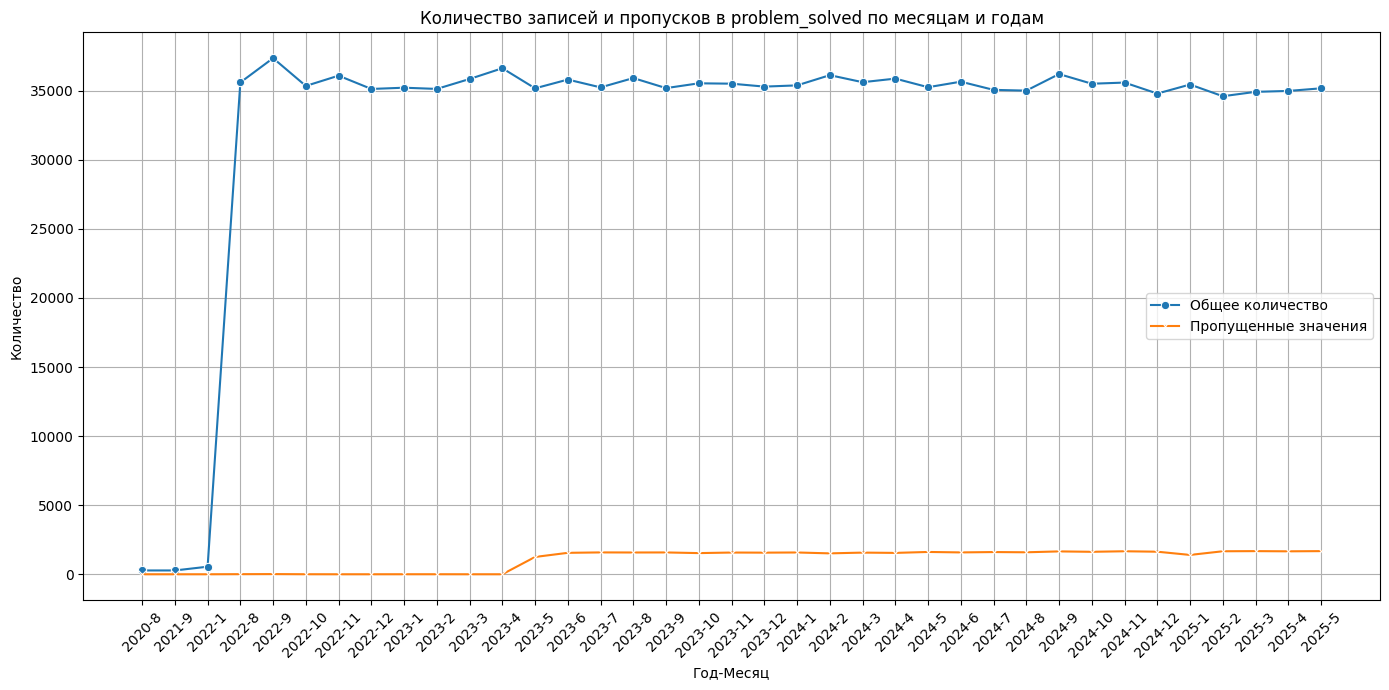

In [458]:
# Посмотрим пропуски в target
period_mapping = {
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12
}

# Применяем маппинг к столбцу 'period'
df['period'] = df['period'].map(period_mapping)

# Группируем данные
grouped_total = df.groupby(['year', 'period'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['year', 'period'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()

result['Year_Month'] = result['year'].astype(str) + '-' + result['period'].astype(str)

# Строим график
plt.figure(figsize=(14, 7))
sns.lineplot(data=result, x='Year_Month', y='total_count', label='Общее количество', marker='o')
sns.lineplot(data=result, x='Year_Month', y='missing_count', label='Пропущенные значения', marker='x')

plt.xticks(rotation=45)
plt.title('Количество записей и пропусков в problem_solved по месяцам и годам')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Удаляем ненужные колонки
# df = df.drop(columns=['respondent_number'])
# TODO посмотреть почему много пропусков
# TODO посмотреть есть ли комментарий

In [459]:
# Проверим, может дело в Регионе
# Группировка с учётом региона
grouped_total = df.groupby(['year', 'period', 'Region'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['year', 'period', 'Region'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

# Объединение результатов
result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()
result = result.sort_values(by=['missing_count','year', 'period', 'Region'],
                            ascending=[False, True, True, True]).head(15)
display(result)


,year,period,Region,total_count,missing_count
2737,2025,3,Донецкая Народная Республика,0,648
2915,2025,5,Донецкая Народная Республика,0,646
2648,2025,2,Донецкая Народная Республика,0,643
2381,2024,11,Донецкая Народная Республика,0,642
2826,2025,4,Донецкая Народная Республика,0,638
2203,2024,9,Донецкая Народная Республика,0,635
2559,2025,1,Донецкая Народная Республика,0,618
2470,2024,12,Донецкая Народная Республика,0,614
2292,2024,10,Донецкая Народная Республика,0,603
2025,2024,7,Донецкая Народная Республика,0,592


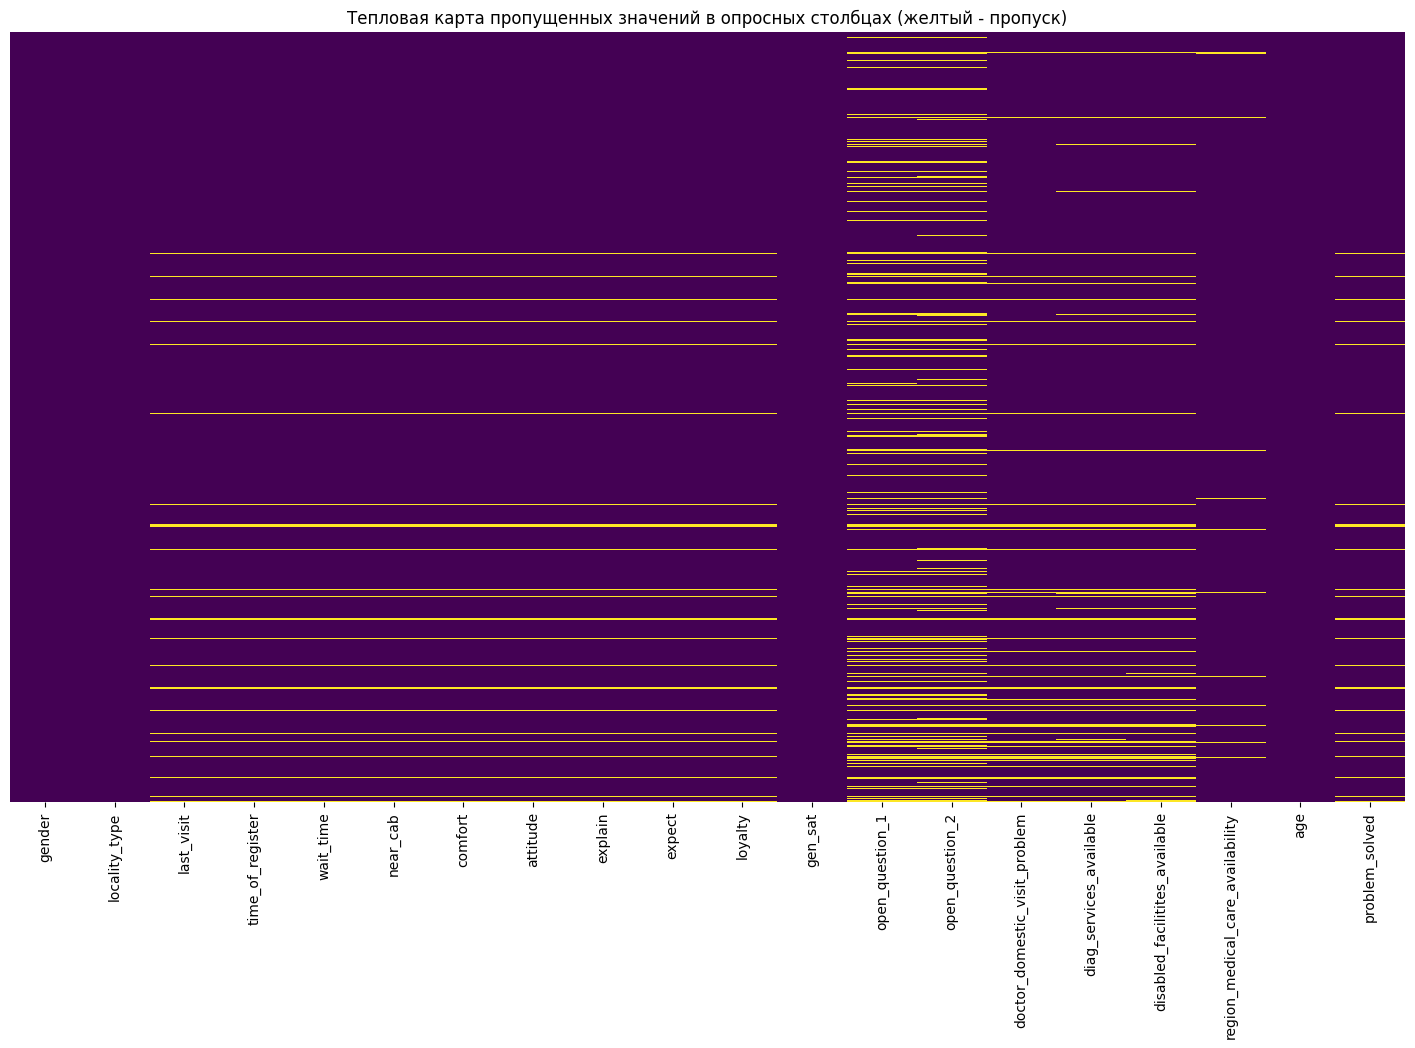

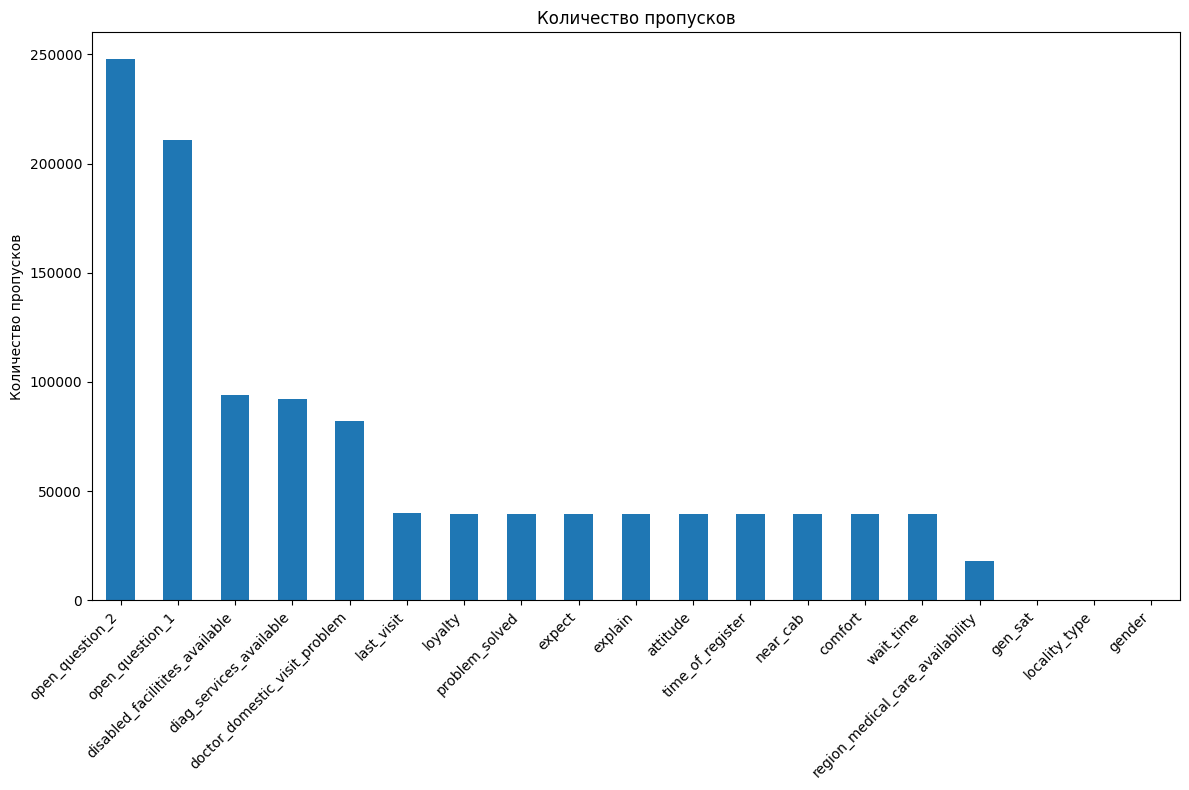

In [460]:
# Посмотрим на пропуски более детально: м.б. строки пустые целиком (т.е. мусор), 
# либо респонденты не ответили на вопросы после того, как посатвили низкую оценку по одному из вопросов (1-2)
df_analysis = df.copy()
# Столбцы, которые НЕ являются оценочными/опросными
id_cols = ['Region', 'year', 'period', 'date_of_survey', 'respondent_number', 'locality', 'org_type']
# Опросные/оценочные столбцы (все, кроме id_cols)
survey_cols = [col for col in df_analysis.columns if col not in id_cols]
# Визуализация общего распределения пропусков ---
plt.figure(figsize=(18, 10))
sns.heatmap(df_analysis[survey_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропущенных значений в опросных столбцах (желтый - пропуск)')
plt.show()

missing_counts = df_analysis[survey_cols].isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0] # Только столбцы с пропусками

plt.figure(figsize=(12, 8))
missing_counts.plot(kind='bar')
plt.title('Количество пропусков')
plt.ylabel('Количество пропусков')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

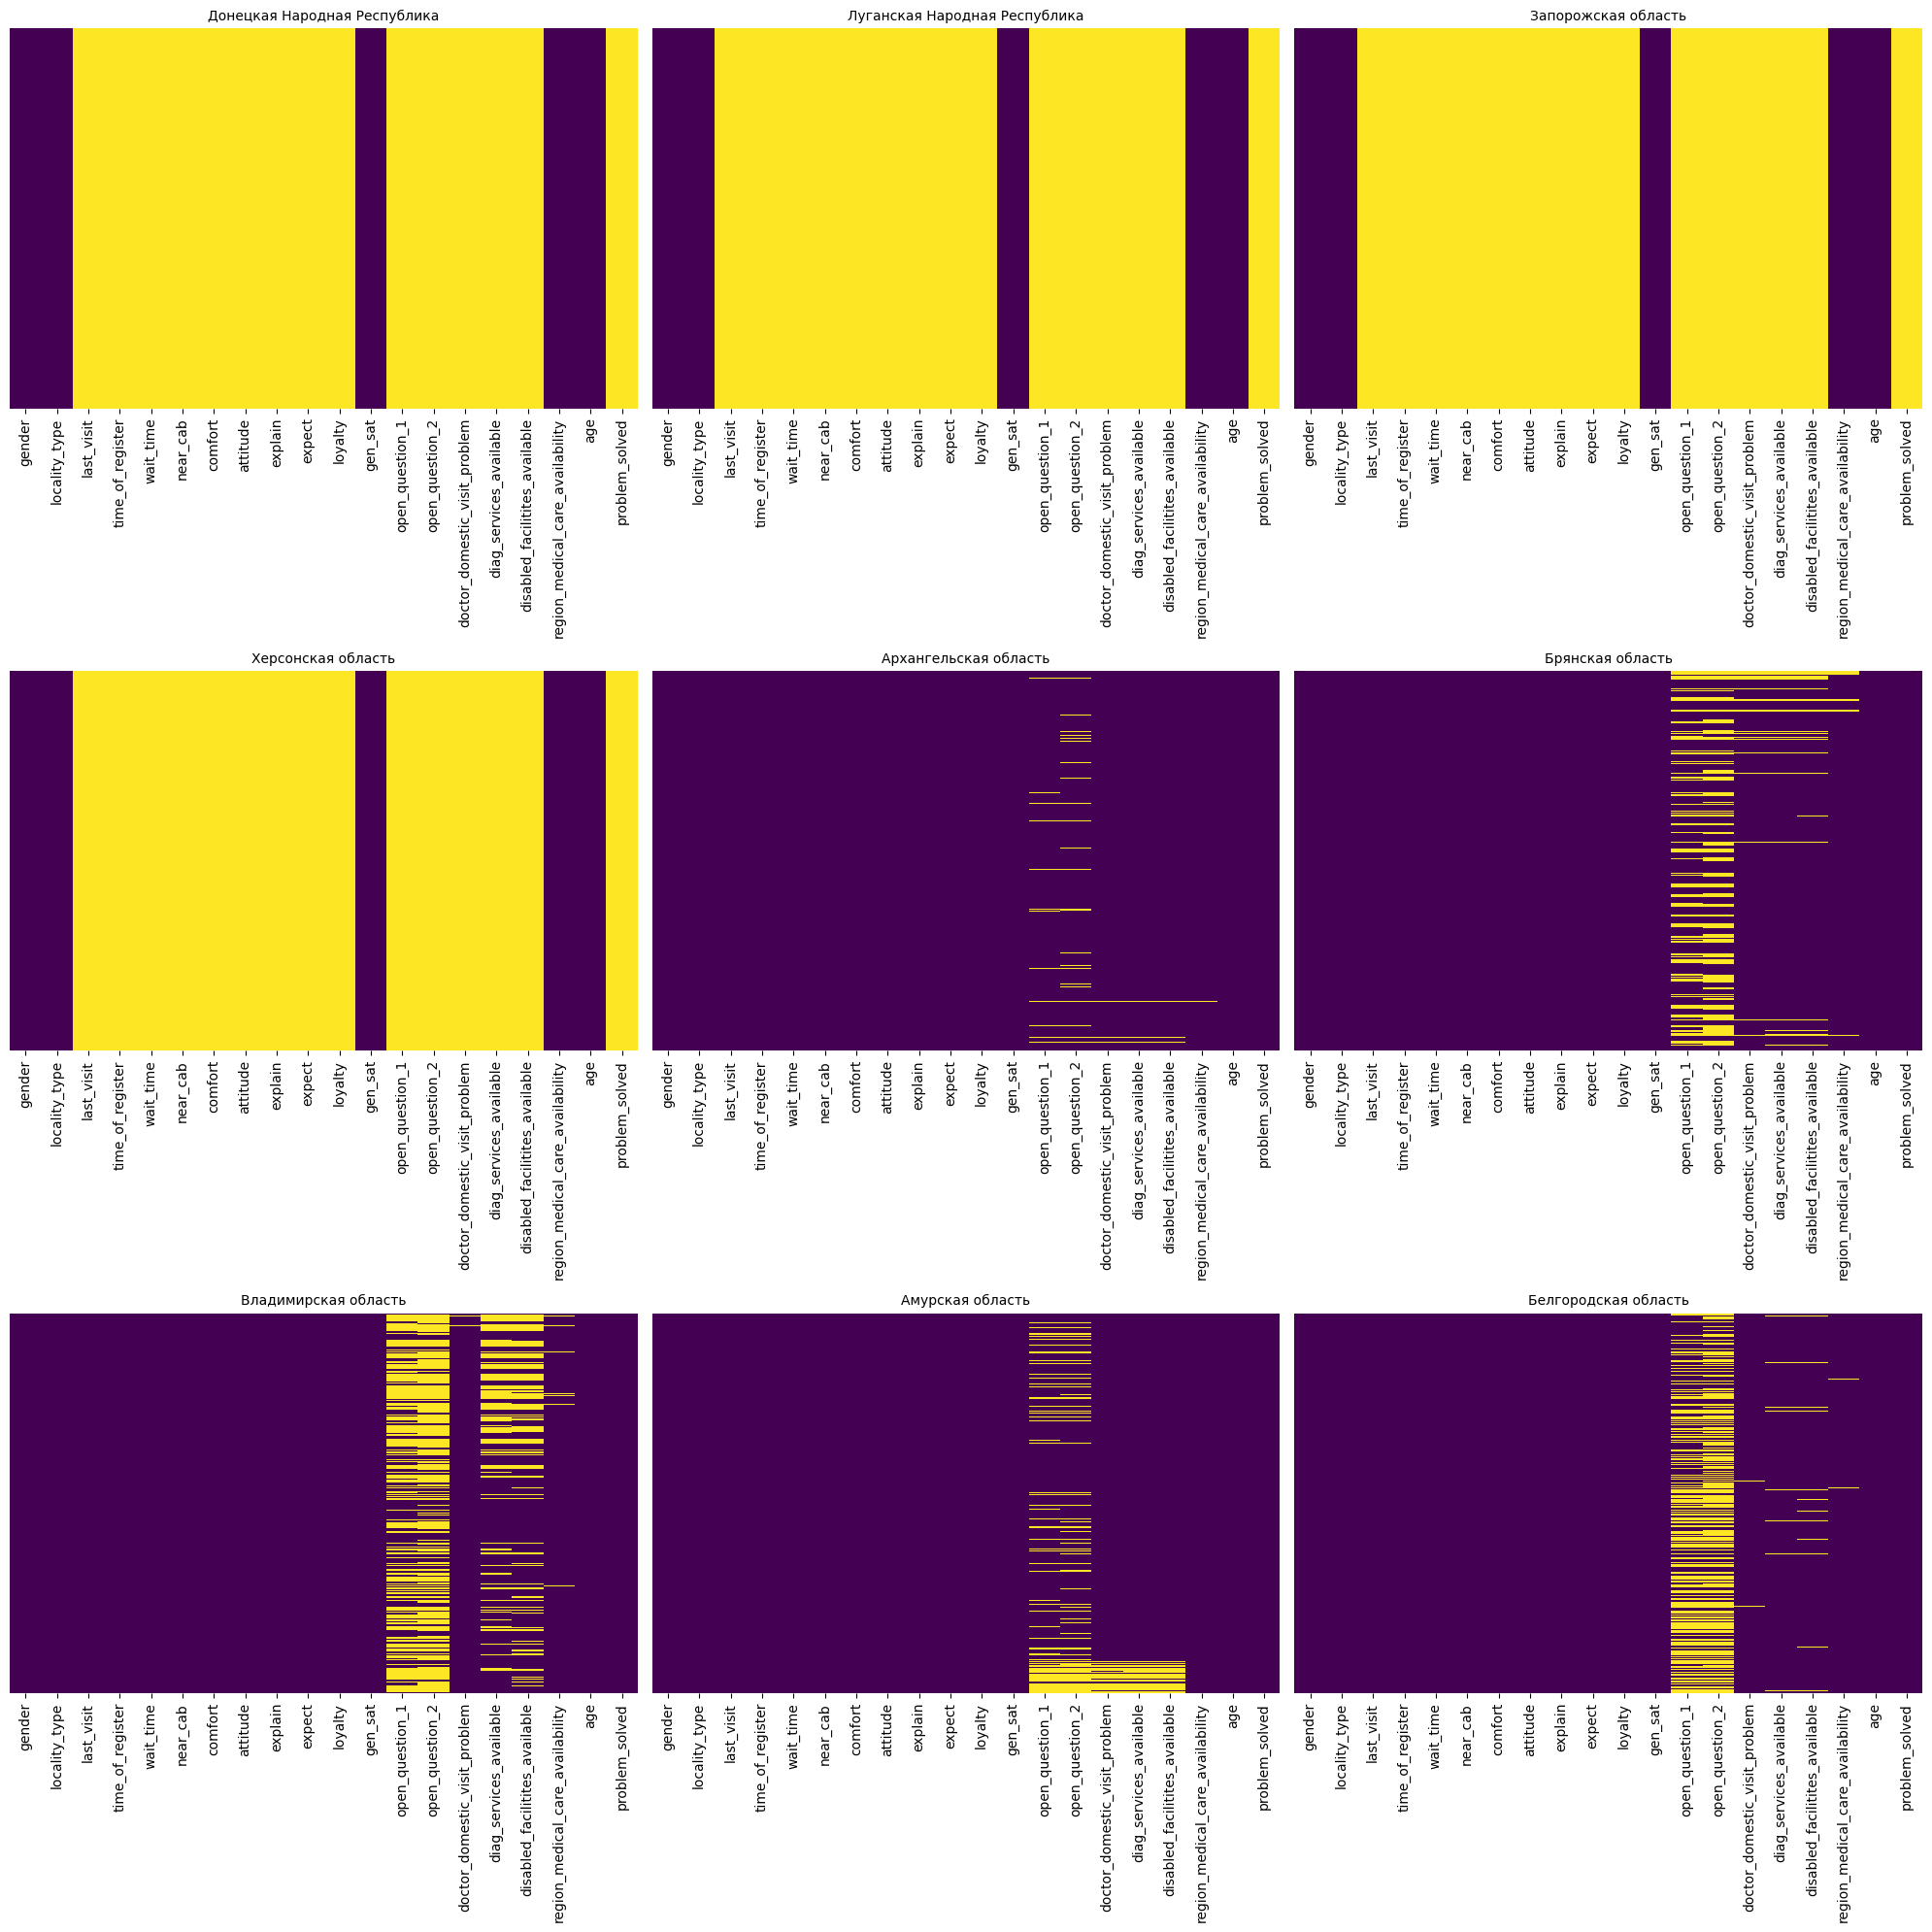

In [461]:
# Получаем топ-16 регионов по количеству пропусков
filtered_df = df[
    (df['period'] == 6) & 
    (df['year'] == 2023)
]
top_regions = filtered_df.groupby('Region')['problem_solved'].apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(9).index
# Создаем фигуру с 16 subplots (4x4)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# heatmaps
for idx, region in enumerate(top_regions):
    region_data = df[df['Region'] == region]
    missing_matrix = region_data[survey_cols].isnull()
    sns.heatmap(missing_matrix, 
                ax=axes[idx],
                cbar=False,
                cmap='viridis',
                yticklabels=False)
    
    axes[idx].set_title(f'{region}', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

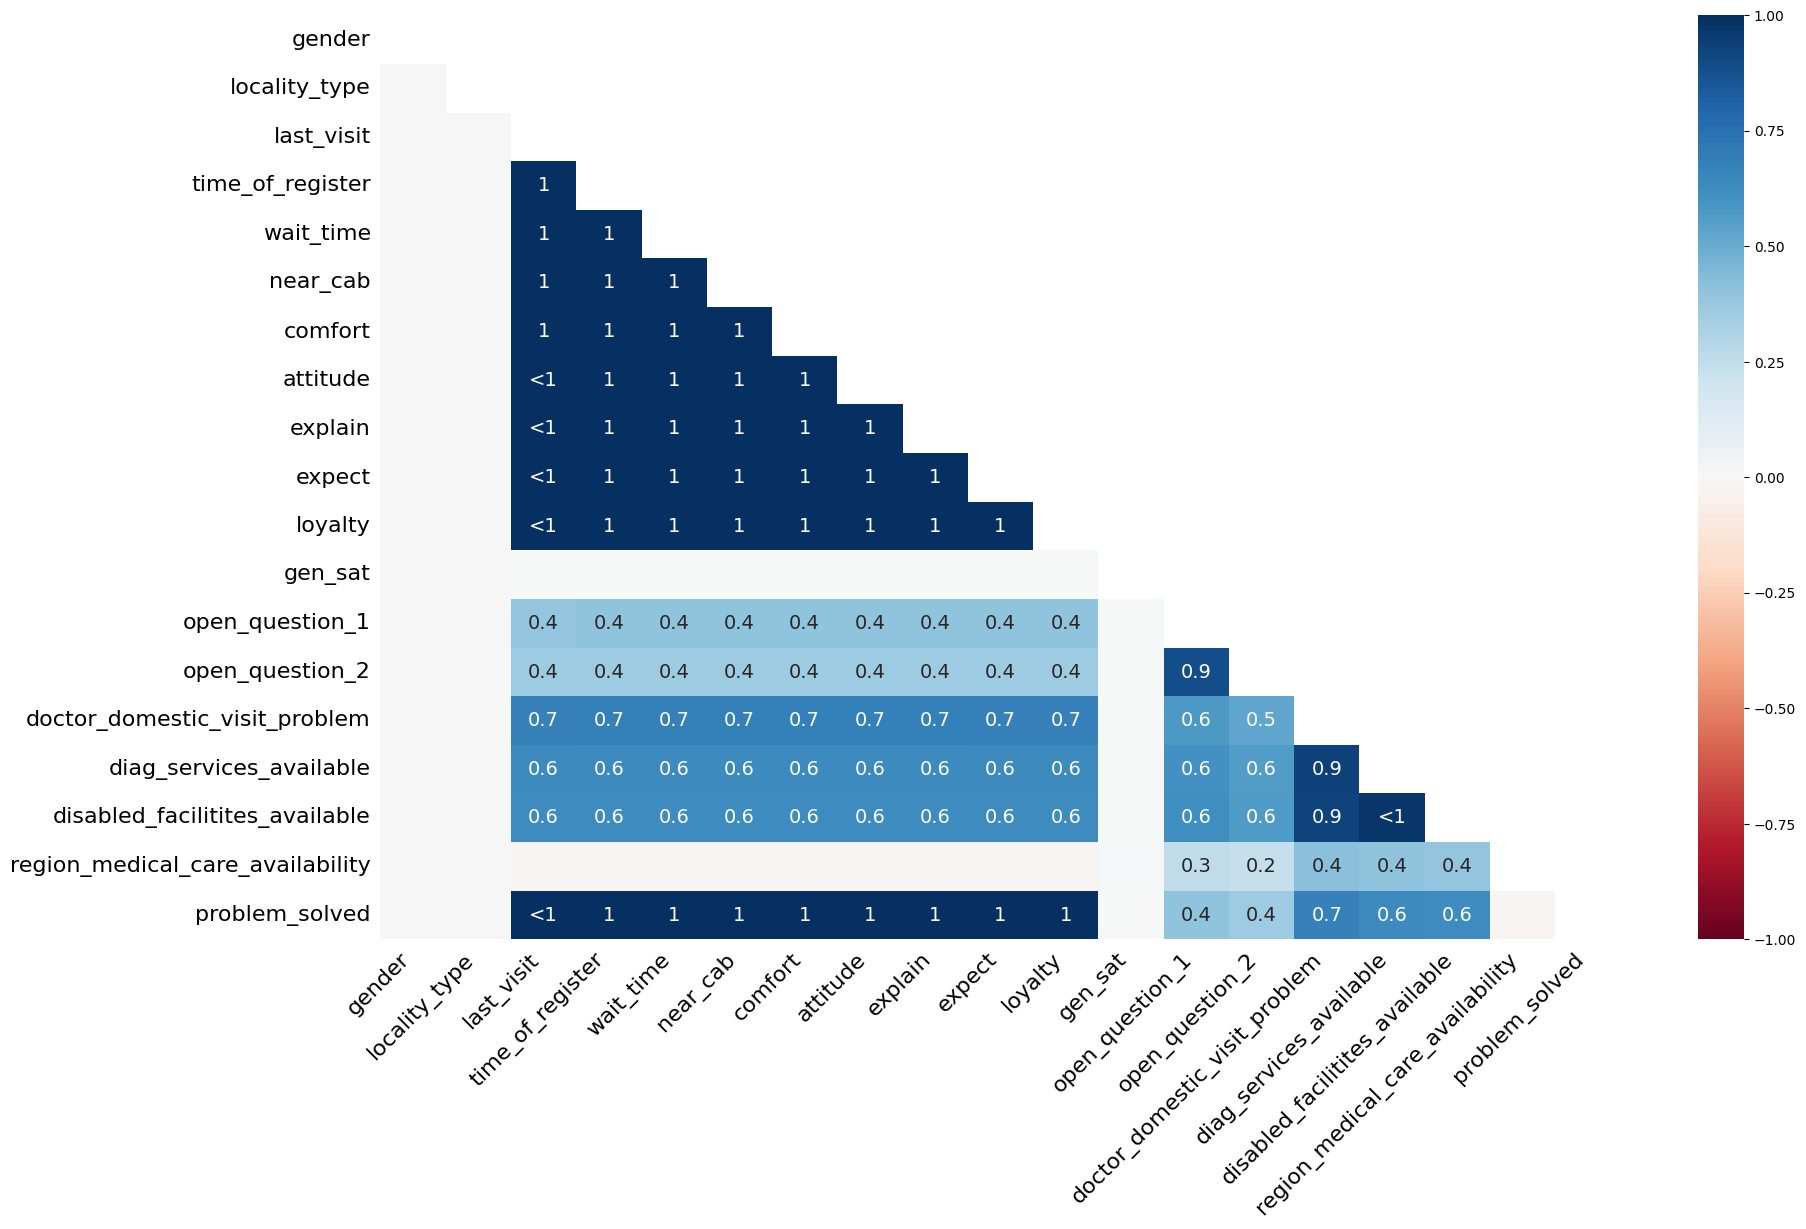

In [462]:
# можно посмтотреть, какие признаки остутствуют вместе, что свидетельствует о полностью пустых строках
import missingno as msno
msno.heatmap(df[survey_cols])
plt.show()


In [463]:
# можно удалить пустые строки
df = df.dropna(subset=['problem_solved'])
df.shape

(1208248, 27)

In [464]:
top_10_regions = df['Region'].value_counts().head(10).index
  
pivot_data = pd.pivot_table(
    df[
        (df['Region'].isin(top_10_regions)) & 
        (df['period'].isin([1, 2, 3, 4, 5, 6])) & 
        (df['year'] == 2024)
    ],
    values='gen_sat',
    index='Region',
    columns=['period','gender'],
    aggfunc=lambda x: round(((x == '4') | (x == '5')).mean() * 100, 1)
)
display(pivot_data.style
        .background_gradient(cmap='Blues', vmin=0, vmax=100)
        .format('{:.1f}%')
        )
# хи квадрат для связи между полом и оценкой
compare1 = pd.crosstab(df['gen_sat'], df['gender']) 
compare2 = pd.crosstab(df['comfort'], df['gender'])
compare3 = pd.crosstab(df['wait_time'], df['gender'])
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 30, 45, 60, 100],
                        labels=['18-30', '31-45', '46-60', '60+'])
compare4 = pd.crosstab(df['gen_sat'], df['age_group'])

chi2, p, dof, expected = chi2_contingency(compare1)  
print(f'Взаимосвязь между полом и оценкой: χ²: {chi2}, p-значение: {p}')  
chi2, p, dof, expected = chi2_contingency(compare2)  
print(f'Взаимосвязь между полом и удобством: χ²: {chi2}, p-значение: {p}') 
chi2, p, dof, expected = chi2_contingency(compare3)  
print(f'Взаимосвязь между полом и временем ожидания: χ²: {chi2}, p-значение: {p}') 
chi2, p, dof, expected = chi2_contingency(compare4)  
print(f'Взаимосвязь между возрастом и оценкой: χ²: {chi2}, p-значение: {p}') 

Взаимосвязь между полом и оценкой: χ²: 138.66839604743637, p-значение: 3.4331024931074367e-28
Взаимосвязь между полом и удобством: χ²: 668.6257456239364, p-значение: 2.980606852803821e-142
Взаимосвязь между полом и временем ожидания: χ²: 588.7431259712108, p-значение: 5.469822743065948e-125
Взаимосвязь между возрастом и оценкой: χ²: 4933.895243562416, p-значение: 0.0


In [465]:
# TODO проверить гипотезу от разной значимости признаков для женщин и мужчин, также для разных возрастов

In [466]:
# TODO могут быть подозрительные данные, когда ту же самую анекету залили в следующем периоде

In [467]:
# TODO доделать преобразование в координаты и создание карты
# df.drop_duplicates(inplace=True)
#df_sample = df.sample(n=10).copy()

In [468]:
'''
# Инициализация геокодера
geolocator = Nominatim(user_agent="geo_example")

# Название села
# location = geolocator.geocode("село Лопатино, Россия")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_sample['geo_coordinates'] = df_sample['Населенный_пункт'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))


df_sample['latitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.latitude if loc else None)
df_sample['longitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.longitude if loc else None)


display(df_sample.head())


missing_coordinates_count = df_sample['geo_coordinates'].isnull().sum()
print(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")
'''

'\n# Инициализация геокодера\ngeolocator = Nominatim(user_agent="geo_example")\n\n# Название села\n# location = geolocator.geocode("село Лопатино, Россия")\n\ngeocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)\n\ndf_sample[\'geo_coordinates\'] = df_sample[\'Населенный_пункт\'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))\n\n\ndf_sample[\'latitude\'] = df_sample[\'geo_coordinates\'].progress_apply(lambda loc: loc.latitude if loc else None)\ndf_sample[\'longitude\'] = df_sample[\'geo_coordinates\'].progress_apply(lambda loc: loc.longitude if loc else None)\n\n\ndisplay(df_sample.head())\n\n\nmissing_coordinates_count = df_sample[\'geo_coordinates\'].isnull().sum()\nprint(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")\n'

In [469]:
# TODO обработать текст open_question_1 и open_question_2
# TODO заджойнить с другими таблицами

### Feature Engineering

In [470]:
# Перевернем таргет
df['problem_solved'] = df['problem_solved'].replace(['Да', 'Нет', 'Затрудняюсь ответить'], [1, 0, 0])
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_30880\2487380674.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['problem_solved'] = df['problem_solved'].replace(['Да', 'Нет', 'Затрудняюсь ответить'], [1, 0, 0])


(1208248, 28)

In [471]:
# создадим фичи на основе вариантов Затрудняюсь ответить
columns = [
    'time_of_register', 'wait_time', 'near_cab', 'comfort',
    'attitude', 'explain', 'expect', 'loyalty', 'gen_sat',
    'diag_services_available', 'disabled_facilitites_available',
    'region_medical_care_availability'
]

for col in columns:
    df[f'{col}_difficult'] = (df[col] == 'Затрудняюсь ответить').astype(int)
    mode_value = df[col].replace('Затрудняюсь ответить', np.nan).mode()[0]
    df[col] = df[col].replace('Затрудняюсь ответить', mode_value) 

In [472]:

# Признаки удовлетворенности
satisfaction_columns = ['time_of_register', 'wait_time', 'near_cab', 'comfort',
                          'attitude', 'explain', 'expect', 'loyalty', 'gen_sat', 'region_medical_care_availability']
    

# Средняя удовлетворенность
value_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
}
df_satisfaction = df[satisfaction_columns].replace(value_map)
df[satisfaction_columns] = df[satisfaction_columns].replace(value_map)
df['avg_satisfaction'] = df[satisfaction_columns].mean(axis=1)

# Стандартное отклонение удовлетворенности
df['satisfaction_std'] = df[satisfaction_columns].std(axis=1)
    
# Количество максимальных оценок
df['max_ratings_count'] = (df[satisfaction_columns] == 5).sum(axis=1)
    
# Количество минимальных оценок
df['min_ratings_count'] = (df[satisfaction_columns] == 1).sum(axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_30880\989413473.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_satisfaction = df[satisfaction_columns].replace(value_map)
C:\Users\User\AppData\Local\Temp\ipykernel_30880\989413473.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[satisfaction_columns] = df[satisfaction_columns].replace(value_map)


In [473]:
# Преобразуем last_visit в числовые значения
visit_mapping = {
        'менее 1 мес. назад': 0.5,
        'от 1 до 3 мес. назад': 2,
        'от 3 до 4 мес. назад': 3.5,
        'от 4 до 6 мес. назад': 5,
        'от 6 до 12 мес. назад': 9,
        'более 12 мес. назад': 18
}
df['last_visit_months'] = df['last_visit'].map(visit_mapping)
df['visit_frequency'] = 1 / (df['last_visit_months'] + 0.1)
# Бинарные признаки
df['is_urban'] = df['locality'].map({'Город': 1, 'Село': 0})
df['is_male'] = (df['gender'] == 'Мужской').astype(int)
df = df.dropna(subset=['org_type'])
df['is_state_org'] = df['org_type'].str.contains('государственных').astype(int)
# Признаки доступности услуг
df['has_home_visit_problem'] = (df['doctor_domestic_visit_problem'] == 'Да').astype(int)
df['diag_available'] = (df['diag_services_available'] == 'Да').astype(int)
df['disabled_facilities'] = (df['disabled_facilitites_available'] == 'Да').astype(int)
# Общий индекс доступности
df['accessibility_index'] = (df['has_home_visit_problem'] + 
                               df['diag_available'] + 
                               df['disabled_facilities']) / 3
    
# Индекс качества обслуживания
df['service_quality_index'] = (df['time_of_register'] + 
                                 df['wait_time'] + 
                                 df['near_cab'] + 
                                 df['comfort']) / 4
    
# Индекс взаимодействия с персоналом
df['staff_interaction_index'] = (df['attitude'] + 
                                   df['explain'] + 
                                   df['expect']) / 3
# Количество респондентов в регионе
region_counts = df['Region'].value_counts()
df['region_respondent_count'] = df['Region'].map(region_counts)
    
# Средняя удовлетворенность по региону
region_satisfaction = df.groupby('Region')['avg_satisfaction'].mean()
df['region_avg_satisfaction'] = df['Region'].map(region_satisfaction)

# Средний возраст по региону
region_age = df.groupby('Region')['age'].mean()
df['region_avg_age'] = df['Region'].map(region_age)
    
# Label Encoding (числовое кодирование)
le = LabelEncoder()
df['region_label'] = le.fit_transform(df['Region'])
# TODO изучить one code encoder, бинарный (сколько колонок потребуется чтобы закодировать 153 уникальных значения), LabelEncoder (отличие от TargetEncoder), кэшированный признак
# TODO как можно закодировать регионы (плюсы и минусы)
# TODO как можно закодировать дату (плюсы и минусы)
# TODO как можно закодировать возраст (плюсы и минусы)
# TODO как можно закодировать пол (плюсы и минусы)
# TODO как можно закодировать тип организации (плюсы и минусы)
# TODO как можно закодировать тип посещения (плюсы и минусы)

# Полиномиальные признаки
numeric_features = [
        'age',
        'avg_satisfaction',
        'satisfaction_std',
        'last_visit_months',
        'visit_frequency',
        'service_quality_index',
        'staff_interaction_index',
        'accessibility_index',
        'region_avg_satisfaction',
        'region_avg_age'
]

# Заполняем пропуски в числовых признаках
for feature in numeric_features:
    if feature in df.columns:
        df[feature] = df[feature].fillna(df[feature].mean())

# Создаем полиномиальные признаки степени 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numeric_features])

feature_names = poly.get_feature_names_out(numeric_features)
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df = poly_df.drop(columns=numeric_features) 
   
# Добавляем полиномиальные признаки к основному DataFrame
df = pd.concat([df.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)
    
# Создаем признаки взаимодействия между удовлетворенностью и демографическими характеристиками
df['satisfaction_age_interaction'] = df['avg_satisfaction'] * df['age']
df['satisfaction_urban_interaction'] = df['avg_satisfaction'] * df['is_urban']
df['satisfaction_gender_interaction'] = df['avg_satisfaction'] * df['is_male']
    
# Взаимодействие между качеством обслуживания и доступностью
df['service_access_interaction'] = df['service_quality_index'] * df['accessibility_index']
    
# Взаимодействие между частотой посещений и удовлетворенностью
df['visit_satisfaction_interaction'] = df['visit_frequency'] * df['avg_satisfaction']


In [474]:
df.shape

(1208204, 119)

### Baseline модель

In [475]:
columns_to_drop = [
    'locality', 'locality_type', 'org_type', 'problem_solved', 'open_question_1', 'open_question_2',
    'doctor_domestic_visit_problem', 'diag_services_available',
    'disabled_facilitites_available', 'last_visit', 'period', 'gender', 'Region', 'date_of_survey', 'age_group'
]


X = df.drop(columns=columns_to_drop)
y = df['problem_solved']

imputer = SimpleImputer(strategy='mean')
# TODO попробовать итерационное обучение +1000 сэмплов
# SMOTE, sklearn imbalanced



X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlflow.set_experiment("Medical_Survey_Analysis")
# Параметры модели
params = {
    'C': 1.0,
    'max_iter': 1000,
    'random_state': 42
}
with mlflow.start_run():
    # Логируем параметры
    mlflow.log_params(params)
    
    # Создаем и обучаем модель
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Вычисляем метрики
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Логируем метрики
    mlflow.log_metrics(metrics)
    
    # Логируем модель
    mlflow.sklearn.log_model(model, "logistic_regression")
    
    # Выводим результаты
    print("\nРезультаты обучения:")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print(f"F1-score: {metrics['f1']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    
    # Сохраняем важные признаки
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print("\nТоп-10 важных признаков:")
    print(feature_importance.head(10))
    # TODO classification report
    # statsmodel

In [ ]:
# добавить подбор гиперпараметров

In [ ]:
# TODO Графики ROC-AUC, PR AUC, гистограмма скоров, precision, recall, f1-score от порога, f01, f05, f2, f5. Какая b на что обращает больше внимание (MLFLOW)

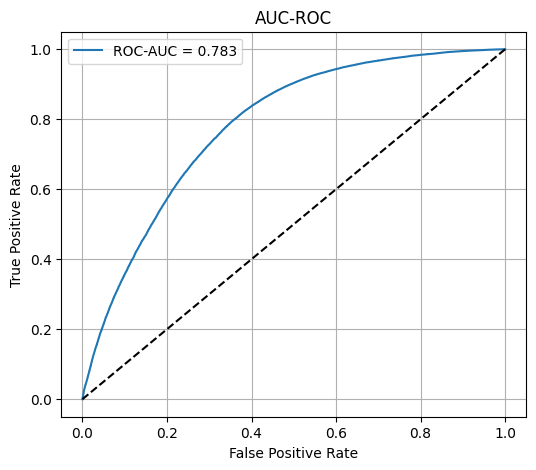

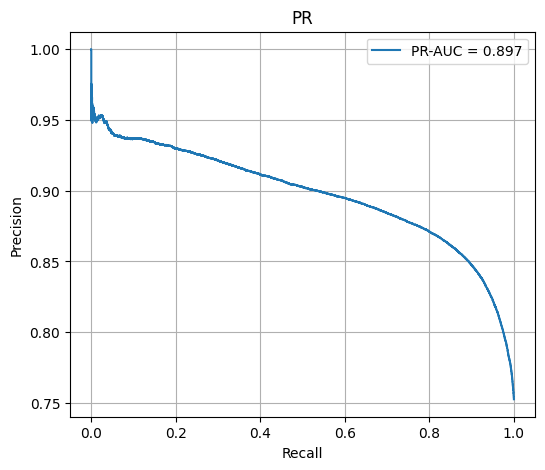

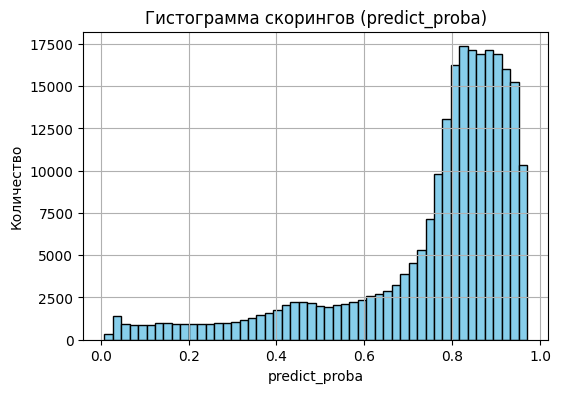

In [477]:
# AUC-ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC')
plt.legend()
plt.grid(True)
plt.show()

# PR
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR')
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма скорингов
plt.figure(figsize=(6, 4))
plt.hist(y_pred_proba, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('predict_proba')
plt.ylabel('Количество')
plt.title('Гистограмма скорингов (predict_proba)')
plt.grid(True)
plt.show()
# TODO hue разграничение с лейблом

2025/06/26 21:36:45 INFO mlflow.tracking.fluent: Experiment with name 'Medical_Survey_Analysis_Age' does not exist. Creating a new experiment.
2025/06/26 21:37:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Результаты обучения линейной регрессии:
MSE: 0.141
RMSE: 0.375
MAE: 0.250
R²: 0.999
MAPE: 0.652%

Топ-10 важных признаков (по абсолютному значению коэффициентов):
                                     feature  coefficient  abs_coefficient
24                          avg_satisfaction       -2.533            2.533
71         last_visit_months visit_frequency        1.117            1.117
41                            region_avg_age        1.032            1.032
40                   region_avg_satisfaction        0.924            0.924
38                   staff_interaction_index        0.888            0.888
28                         last_visit_months       -0.755            0.755
37                     service_quality_index        0.442            0.442
29                           visit_frequency        0.360            0.360
25                          satisfaction_std        0.328            0.328
60  avg_satisfaction region_avg_satisfaction        0.296            0.296

Свободный 

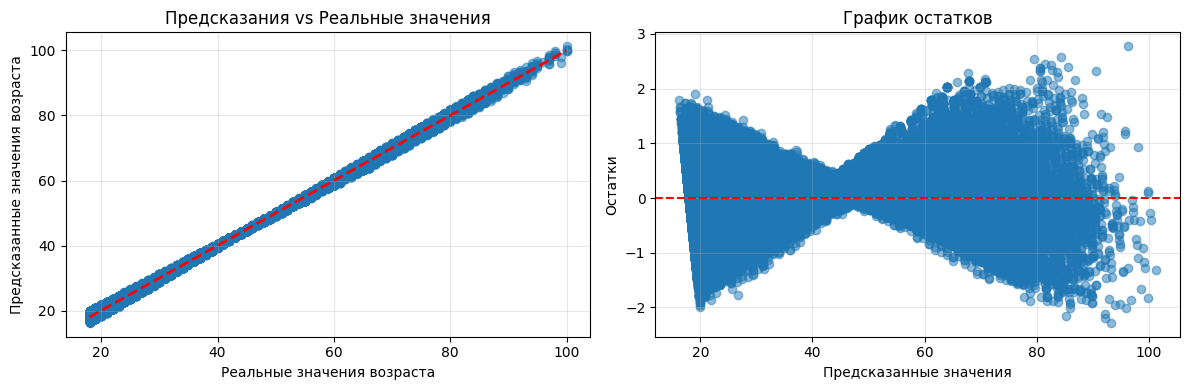

In [481]:
y = df['age']
X = X.drop(columns=['age'])
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlflow.set_experiment("Medical_Survey_Analysis_Age")
# Параметры модели
params = {
    'fit_intercept': True,
    'copy_X': True,
    'n_jobs': -1,
    'positive': False
}
with mlflow.start_run():
    # Логируем параметры
    mlflow.log_params(params)
    
    # Создаем и обучаем модель
    model = LinearRegression(**params)
    model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    
    # Вычисляем метрики
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'mape': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    }
    
    # Логируем метрики
    mlflow.log_metrics(metrics)
    
    # Логируем модель
    mlflow.sklearn.log_model(model, "linear_regression")
    
    # Выводим результаты
    print("\nРезультаты обучения линейной регрессии:")
    print(f"MSE: {metrics['mse']:.3f}")
    print(f"RMSE: {metrics['rmse']:.3f}")
    print(f"MAE: {metrics['mae']:.3f}")
    print(f"R²: {metrics['r2']:.3f}")
    print(f"MAPE: {metrics['mape']:.3f}%")
    
    # Сохраняем важные признаки
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': model.coef_
    })
    feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
    feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)
    
    print("\nТоп-10 важных признаков (по абсолютному значению коэффициентов):")
    print(feature_importance.head(10))
    
    # Дополнительная информация о модели
    print(f"\nСвободный член (intercept): {model.intercept_:.3f}")
    print(f"Количество признаков: {len(model.coef_)}")
    
    # Визуализация результатов
    
    plt.figure(figsize=(12, 4))
    
    # График предсказаний vs реальных значений
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Реальные значения возраста')
    plt.ylabel('Предсказанные значения возраста')
    plt.title('Предсказания vs Реальные значения')
    plt.grid(True, alpha=0.3)
    
    # График остатков
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title('График остатков')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# TODO написать функцию для передачи модели в mlflow

In [ ]:
# TODO обучать модель внутри контекта